# Wine Quality Prediction: Tabular Foundation Models vs. Tree-Based Methods

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()
hf_token = os.getenv("HFTOKEN")

Shape: (4898, 12)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Dtypes:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Head:
    fixed acidity  vo

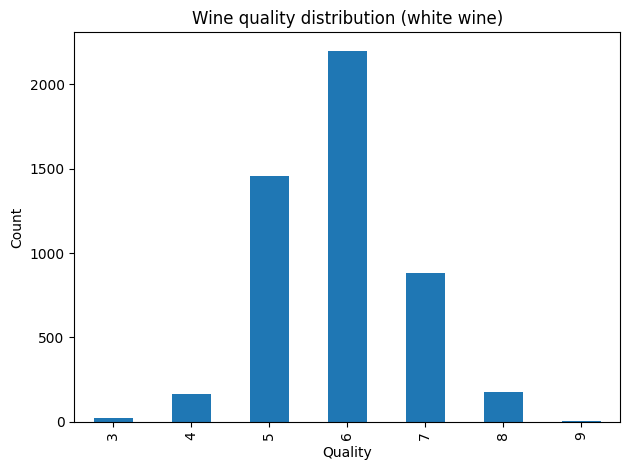

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from tabpfn import TabPFNRegressor

path = "./data/winequality-white.csv"
df = pd.read_csv(path, sep=";")

print("Shape:", df.shape)
print("Columns:", list(df.columns))
print("\nDtypes:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())

pd.set_option("display.width", 140)
pd.set_option("display.max_columns", 50)

print("\nHead:\n", df.head())
print("\nSummary stats:\n", df.describe(include="all").T)

target_col = "quality"
quality_counts = df[target_col].value_counts().sort_index()
print("\nQuality value counts:\n", quality_counts)

feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)
print("\nSplit shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.figure()
quality_counts.plot(kind="bar")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Wine quality distribution (white wine)")
plt.tight_layout()
plt.show()

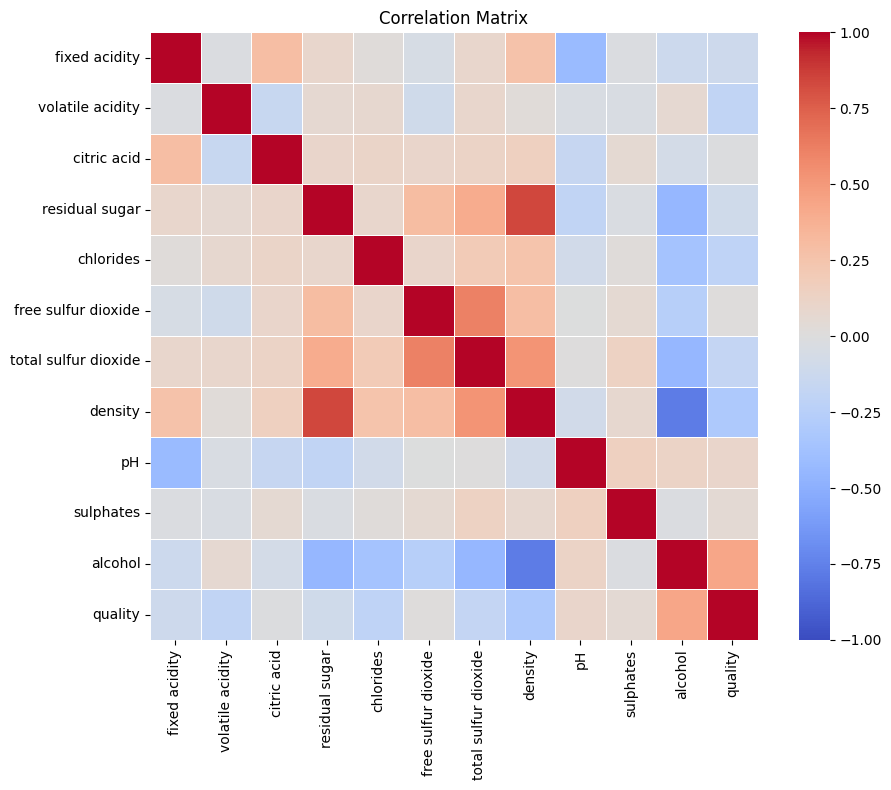

In [14]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    vmin=-1, vmax=1,
    cmap="coolwarm",
    annot=False,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


### TabPFN

In [ ]:
tabpfn_model = TabPFNRegressor(device="cuda")

tabpfn_model.fit(X_train, y_train)
y_pred = tabpfn_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"TabPFNRegressor: RMSE={rmse:.4f}  MAE={mae:.4f}  R2={r2:.4f}")

plt.figure()
plt.scatter(y_test, y_pred, s=10)
plt.xlabel("True quality")
plt.ylabel("Predicted quality")
plt.title("TabPFN regression: y_true vs y_pred")
plt.tight_layout()
plt.show()

tabpfn-v2.5-regressor-v2.5_default.ckpt:   0%|          | 0.00/40.8M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

RuntimeError: Running on CPU with more than 1000 samples is not allowed by default due to slow performance.
To override this behavior, set the environment variable TABPFN_ALLOW_CPU_LARGE_DATASET=1 or set ignore_pretraining_limits=True.
Alternatively, consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client